# 5 - Camera Calibration

### Equations

$$Distortion_{coeffients} = \left [ p_1 p_2 k_1 k_2 p_3 \right ]$$

**Radial Distortion Equations**

$$x_{distorted} = x_{ideal}(1 + k_1r^2 + k_2r^4 + k_3r^6)$$
$$y_{distorted} = y_{ideal}(1 + k_1r^2 + k_2r^4 + k_3r^6)$$

**Tangential Distortion Equations**

$$x_{corrected} = x + [2p_1xy + p_2(r^2 + 2x^2)]$$
$$y_{corrected} = y + [p_1(r^2 + 2y^2) + 2p_2xy]$$

In [7]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

### Finding corners

In [17]:
# find corners for an image
fname = './calibration_images/GOPR0032.jpg'
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
imgpoints = [] # coods in 2d image
objpoints = [] # coods in 3d of real undistorted chessboard where z is zero from top left to bottom right

# board size
nx = 8
ny = 6

# initialize objpoints as all zeros
objp = np.zeros((nx*ny,3), np.float32)
# original shape here (2,8,6)
# transpose makes it (6,8,2)
# reshape makes it (48,2) -> x,y
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

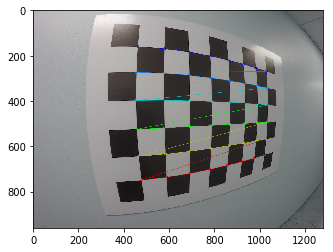

In [19]:
# find chessboard corners

# cv2.findChessboardCorners(image, patternSize[, corners[, flags]]) → retval, corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# if corners found append image points and object points
if ret:
    imgpoints.append(corners)
    objpoints.append(objp)
    # draw and display the corners
    # cv.DrawChessboardCorners(image, patternSize, corners, patternWasFound) 
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.show()
else:
    print('No corners found')

### Calibration
`ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)`

### Undistort
`undist = cv2.undistort(img, mtx, dist, None, mtx)`

In [2]:
# get a list of images
images = glob.glob('calibration_images/GOPR*.jpg')

In [22]:
imgpoints = [] # coods in 2d image
objpoints = [] # coods in 3d of real undistorted chessboard where z is zero from top left to bottom right

# board size
nx = 8
ny = 6

# initialize objpoints as all zeros
objp = np.zeros((nx*ny,3), np.float32)
# original shape here (2,8,6)
# transpose makes it (6,8,2)
# reshape makes it (48,2) -> x,y
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

In [24]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        #cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)